In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries Imported.")

Libraries Imported.


In [2]:
df = pd.read_csv("healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [4]:
df.duplicated().sum()

534

In [5]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [6]:
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [7]:
data = df.drop(columns=['Name','Doctor','Hospital','Room Number','Medication','Date of Admission','Discharge Date'])

In [8]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Abnormal


In [9]:
disease = df['Medical Condition']
disease.value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [10]:
disease_type = list(disease.value_counts().keys())
patient_of_disease = list(disease.value_counts().values)

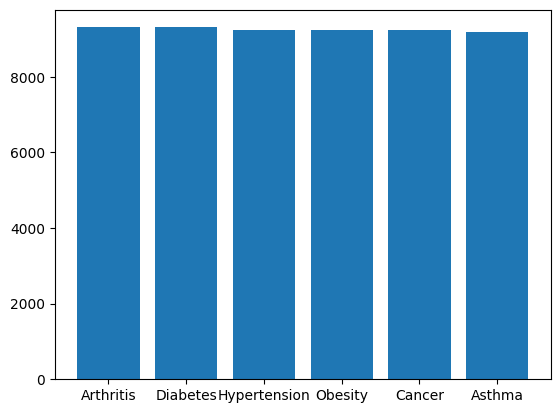

In [11]:
plt.bar(disease_type,patient_of_disease)
plt.show()

In [12]:
cat_col = data.select_dtypes(include='O')
cat_col.head()

,Gender,Blood Type,Medical Condition,Insurance Provider,Admission Type,Test Results
0,Male,B-,Cancer,Blue Cross,Urgent,Normal
1,Male,A+,Obesity,Medicare,Emergency,Inconclusive
2,Female,A-,Obesity,Aetna,Emergency,Normal
3,Female,O+,Diabetes,Medicare,Elective,Abnormal
4,Female,AB+,Cancer,Aetna,Urgent,Abnormal


In [13]:
num_col = data.select_dtypes(exclude='O')
num_col.head()

,Age,Billing Amount
0,30,18856.281306
1,62,33643.327287
2,76,27955.096079
3,28,37909.782410
4,43,14238.317814


In [14]:
medical_group = df.groupby('Medical Condition')
medical_record = medical_group['Billing Amount'].agg(min_price='min',max_price='max',avg_price='mean')
medical_record

,min_price,max_price,avg_price
Medical Condition,,,
Arthritis,-1129.997176,52170.036854,25497.327056
Asthma,-1520.420555,52181.837792,25635.249359
Cancer,-2008.492140,52373.032374,25161.792707
Diabetes,-1316.618581,52211.852966,25638.405577
Hypertension,-1660.009373,52764.276736,25497.095761
Obesity,-1310.272895,52024.726443,25805.971259


In [15]:
data['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [16]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Normal
1,62,Male,A+,Obesity,Medicare,33643.327287,Emergency,Inconclusive
2,76,Female,A-,Obesity,Aetna,27955.096079,Emergency,Normal
3,28,Female,O+,Diabetes,Medicare,37909.782410,Elective,Abnormal
4,43,Female,AB+,Cancer,Aetna,14238.317814,Urgent,Abnormal


In [17]:
df2 = pd.get_dummies(data,drop_first='if_binary').astype(int)
df2.head()

,Age,Billing Amount,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,...,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal
0,30,18856,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1,62,33643,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,76,27955,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,28,37909,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,43,14238,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
x = df2.drop('Billing Amount',axis=1)
y = df2['Billing Amount']
x.head()

,Age,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,...,Medical Condition_Hypertension,Medical Condition_Obesity,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal
0,30,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1,62,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
2,76,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# training and testing split..
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [21]:
# model or algorithm training...
from sklearn.ensemble import RandomForestRegressor

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
rdr = RandomForestRegressor()

# training algorithm...

rdr.fit(x_train,y_train)
print("RandomForestRegressor successfully trained.")

print("RandomForestRegressor Training score: ",rdr.score(x_train,y_train) * 100)
print("RandomForestRegressor Testing score: ",rdr.score(x_test,y_test) * 100)

RandomForestRegressor successfully trained.
RandomForestRegressor Training score:  80.48762191837089
RandomForestRegressor Testing score:  -10.422062605245962


In [24]:
import joblib,os

In [25]:
os.makedirs('models',exist_ok=True)

In [26]:
joblib.dump(rdr,"./models/randomforest_model.lb")
print("successfully saved your algorithm at this location : ./models/randomforest_model")

successfully saved your algorithm at this location : ./models/randomforest_model


In [27]:
randomforest_prediction = rdr.predict(x_test)

In [28]:
compare_df = pd.concat([x_test,y_test],axis='columns')
compare_df['randomforest_prediction'] = randomforest_prediction
compare_df.head()

,Age,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Medical Condition_Asthma,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal,Billing Amount,randomforest_prediction
33938,74,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,19687,18992.085000
21347,22,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,21229,25321.566667
47434,23,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,19421,24564.030000
49837,58,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,43785,30976.552000
47717,76,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,17955,25537.510000


In [29]:
os.makedirs('prediction',exist_ok=True)

In [30]:
compare_df.to_csv('./prediction/.prediction.csv',index=False)
print('saved')

saved
